In [1]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

# Zad 1 

Wybrałam metodę Nelder-Mead. Jest to metoda, która wylicza wartość funkcji w danym punkcie i porównuje z innymi wartościami, wybiera kolejne punkty, porównuje wartości itd. Nie używa pochodnych. Zaczynamy od wyboru kształtu (simplex), która ma n+1 wierzcholków dla n-wymiarowej funkcji. 

Przykładowo kiedy mamy figurę o trzech punktach, obliczamy wartość funkcji w tych punktach. Następnie zastępujemy "najgorszy" punkt (W) jego odbiciem (R). Kolejne etapy (expansion, contraction i shrink) w odpowiedni sposób podmieniają najgorsze punkty, sprawdzają, jakie są wartości w nowo wybranych punktach i na tej podstawie przeprowadzają kolejne kroki.

Ta metoda daje zadowalające wyniki, jednak nie zawsze jest zbieżna.

In [2]:
f1 = lambda x: x[0]**2 - 2 * x[0]
f2 = lambda x: (x[0] - 1)**3 - x[0] ** 2
f3 = lambda x: 100* (x[1] - x[0] ** 2)**2 +(1 - x[0])**2

In [3]:
def f11(x):
    return x**2 - 2*x
def f21(x):
    return (x-1)**3 - x **2
def f31(x,y):
    return 100* (y - x ** 2)**2 +(1 - x)**2

In [4]:
x1 = [3]
x2 = [0.5]
x3 = [-1.2, 1.0]

In [5]:
def callback_fun(x):
    result.append(x[0])
    
def nelder_mead(f, x):
    res = minimize(f, x, method = 'Nelder-Mead', callback = callback_fun)
    print("Znalezione minimum: ", res.x)
    return res

def plot_result(result, res, f, f_n):
    xs = [i + 1 for i in range(len(result))]
    print("Błąd: ")
    plt.plot(xs, result - res.x[0])
    plt.xlabel("Numer iteracji")
    plt.ylabel("Błąd")
    plt.show()
    
    xx = np.linspace(-1, 3, 100)
    ys = []
    for i in range(len(xx)):
        ys.append(f_n(xx[i]))
    f_res = []
    for i in range(len(result)):
        f_res.append(f_n(result[i]))
        
    plt.plot(xx, ys)
    plt.scatter(result[0], f_res[0], c = 'red')
    plt.scatter(result[1:], f_res[1:])
    plt.xlabel("x")
    plt.ylabel("y")
        

Pierwszy przykład to stosunkowo prosta funkcja kwadratowa - f(x) = 2 * x^2 - 2 * x. Minimum wynosi 1, co zgadza się z wartością obliczoną analitycznie.

Znalezione minimum:  [0.99997559]
Błąd: 


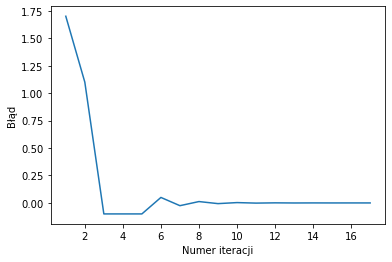

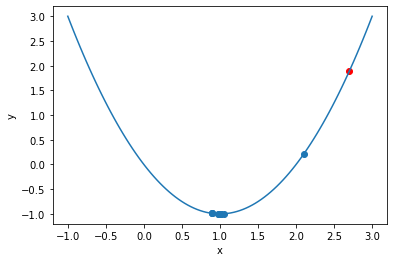

In [6]:
result = []
res = nelder_mead(f1, x1)
plot_result(result, res, f1, f11)

Znalezione minimum:  [2.21523438]
Błąd: 


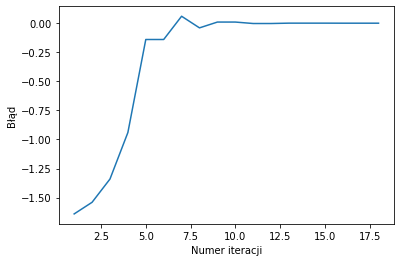

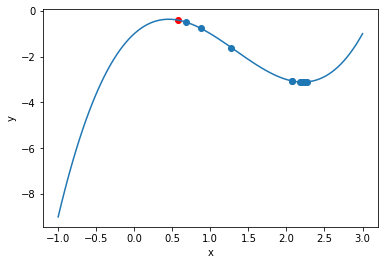

In [7]:
result = []
res = nelder_mead(f2, x2)
plot_result(result, res, f2, f21)

In [8]:
nelder_mead(f3, x3)

Znalezione minimum:  [1.00002202 1.00004222]


 final_simplex: (array([[1.00002202, 1.00004222],
       [0.99999529, 0.99998729],
       [0.99997589, 0.9999541 ]]), array([8.17766120e-10, 1.10754897e-09, 1.12292970e-09]))
           fun: 8.177661197416674e-10
       message: 'Optimization terminated successfully.'
          nfev: 159
           nit: 85
        status: 0
       success: True
             x: array([1.00002202, 1.00004222])